# Aula 9 - ANOVA Fatorial e Medidas Repetidas

Para ANOVA e Testes Post-Hoc, pode-se utilizar o pacote [pingouin](https://pingouin-stats.org/) 

Esta aula utiliza os dados publicados no artigo [The Perception of Green Facades and its Effects on Public Spaces’ Users](https://estudosemdesign.emnuvens.com.br/design/article/view/1209).

[Download direto do pdf](https://estudosemdesign.emnuvens.com.br/design/article/download/1209/480).

ANOVA Fatorial é um caso especial de regressão múltipla com preditores perfeitamente independentes.

Utiliza:
- duas ou mais variáveis independentes.
- uma variável dependente.

Em função disso, é possível testar o efeito principal de cada variável (V1, V2, V3, ...) e a interação entre variáveis (V1xV2, V1xV3, V2xV3, V1xV2xV3, ...).

Também é possível testar o efeito simples (o efeito de uma variável independente em um nível específico da outra variável independente).

Resultados podem apontar efeitos e interações, efeitos sem interação e interações sem efeitos principais.

Testes de ANOVA fatorial, presupõem:

- Variável Dependente é contínua (intervalo ou razão).
- Variável Dependente tem distribuição normal.
- Homogeneidade da variância (teste de Levene).

Distingue-se o tipo de ANOVA em função do tipo de dado, da mesma forma que os testes-t:

ANOVA de medidas repetidas:
- Análogo ao teste-t dependente

ANOVA entre grupos:
- Análogo ao teste-t independente

## Testes de Acompanhamento

Quando há efeitos principais: Testes post-hoc

Quando há Interação: Análises de efeitos simples (série de one-way ANOVAs, ou testes-t).

### Exemplo de Aplicação

In [93]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import seaborn as sns
from scipy.stats import t, levene

In [39]:
# Importar base de dados
hedges = pd.read_excel('../data/hedges_light.xlsx')

In [94]:
# Informações gerais da base
hedges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   usr_id       260 non-null    int64  
 1   env_id       260 non-null    int64  
 2   gf_pres      260 non-null    object 
 3   shape        260 non-null    object 
 4   color        260 non-null    object 
 5   stay         260 non-null    int64  
 6   eat_drink    260 non-null    int64  
 7   rest         260 non-null    int64  
 8   wait         260 non-null    int64  
 9   read         260 non-null    int64  
 10  inviting     260 non-null    int64  
 11  comfort      260 non-null    int64  
 12  appear       260 non-null    int64  
 13  atm          260 non-null    int64  
 14  org          260 non-null    int64  
 15  fam          260 non-null    int64  
 16  safety       260 non-null    int64  
 17  refinement   260 non-null    int64  
 18  interest     260 non-null    int64  
 19  maint   

In [95]:
# Formato da base
hedges.shape

(260, 24)

In [96]:
# Lista de atributos
hedges.columns

Index(['usr_id', 'env_id', 'gf_pres', 'shape', 'color', 'stay', 'eat_drink',
       'rest', 'wait', 'read', 'inviting', 'comfort', 'appear', 'atm', 'org',
       'fam', 'safety', 'refinement', 'interest', 'maint', 'green_amt',
       'artif_nat', 'dsgn', 'gf_interest'],
      dtype='object')

In [97]:
# Amostra aleatória de 10 entradas
hedges.sample(10)

,usr_id,env_id,gf_pres,shape,color,stay,eat_drink,rest,wait,read,...,org,fam,safety,refinement,interest,maint,green_amt,artif_nat,dsgn,gf_interest
134,14,4,Yes,Grid,Green,5,5,5,6,4,...,6,4,4,4,5,7.0,6.0,2.0,2.0,5.0
82,9,2,Yes,Flat,Red,5,4,5,5,5,...,3,4,4,5,5,6.0,2.0,4.0,5.0,5.0
34,4,4,Yes,Grid,Green,6,6,5,5,5,...,7,5,4,5,4,7.0,4.0,5.0,6.0,4.0
235,24,5,Yes,Grid,Red,3,3,3,7,3,...,5,4,4,3,4,7.0,6.0,1.0,4.0,3.0
22,3,2,Yes,Flat,Red,4,4,4,5,3,...,4,3,3,5,4,5.0,3.0,2.0,3.0,4.0
140,15,0,No,0,0,3,2,5,6,4,...,7,4,4,5,3,NaN,NaN,NaN,NaN,NaN
101,11,1,Yes,Flat,Green,6,6,6,4,6,...,5,6,5,2,3,3.0,5.0,7.0,4.0,3.0
71,8,1,Yes,Flat,Green,4,5,5,5,3,...,4,4,4,3,2,5.0,4.0,2.0,2.0,2.0
207,21,7,Yes,Wave,Green,5,5,5,5,4,...,4,4,4,4,5,4.0,5.0,3.0,4.0,5.0
206,21,6,Yes,Grid,Yellow,4,4,5,5,4,...,5,4,4,4,5,5.0,5.0,2.0,3.0,4.0


In [73]:
# Remover dados faltantes
hedges_filtered = hedges.dropna()
hedges_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 259
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   usr_id       234 non-null    int64  
 1   env_id       234 non-null    int64  
 2   gf_pres      234 non-null    object 
 3   shape        234 non-null    object 
 4   color        234 non-null    object 
 5   stay         234 non-null    int64  
 6   eat_drink    234 non-null    int64  
 7   rest         234 non-null    int64  
 8   wait         234 non-null    int64  
 9   read         234 non-null    int64  
 10  inviting     234 non-null    int64  
 11  comfort      234 non-null    int64  
 12  appear       234 non-null    int64  
 13  atm          234 non-null    int64  
 14  org          234 non-null    int64  
 15  fam          234 non-null    int64  
 16  safety       234 non-null    int64  
 17  refinement   234 non-null    int64  
 18  interest     234 non-null    int64  
 19  maint   

In [89]:
env_index = hedges_filtered.groupby('env_id')[['stay', 'eat_drink', 'rest', 'wait', 'read', 'inviting', 'comfort', 'appear', 'atm',
                                      'org', 'fam', 'safety', 'refinement', 'interest', 'maint', 'green_amt', 'artif_nat', 'dsgn', 'gf_interest']].mean()
env_index


,stay,eat_drink,rest,wait,read,inviting,comfort,appear,atm,org,fam,safety,refinement,interest,maint,green_amt,artif_nat,dsgn,gf_interest
env_id,,,,,,,,,,,,,,,,,,,
1,4.269231,4.192308,4.730769,4.038462,4.153846,4.153846,4.269231,4.153846,3.384615,3.692308,4.269231,4.230769,2.846154,3.076923,3.961538,5.576923,4.384615,3.500000,3.076923
2,4.384615,4.076923,4.269231,5.615385,3.538462,4.653846,4.153846,4.576923,5.076923,4.153846,4.000000,4.038462,5.076923,4.884615,5.653846,4.423077,3.461538,4.461538,4.961538
3,4.692308,4.346154,4.576923,5.038462,3.884615,4.461538,4.307692,4.461538,5.115385,3.846154,3.923077,4.076923,4.730769,4.500000,5.192308,4.423077,3.461538,4.153846,4.807692
4,4.807692,4.769231,4.923077,4.384615,4.346154,4.461538,4.538462,4.730769,4.269231,5.000000,4.192308,4.423077,3.615385,3.423077,5.500000,5.153846,4.346154,4.230769,3.538462
5,4.115385,4.038462,4.038462,5.038462,3.461538,4.461538,3.923077,4.192308,5.076923,6.076923,3.884615,4.153846,4.846154,4.615385,5.769231,4.230769,3.076923,3.961538,4.576923
6,4.192308,4.076923,4.538462,5.000000,3.884615,4.730769,4.307692,4.269231,4.884615,5.038462,4.038462,4.038462,4.653846,4.538462,5.884615,4.653846,3.730769,4.384615,4.692308
7,4.769231,4.538462,4.730769,4.692308,4.153846,4.846154,4.769231,4.538462,4.307692,3.730769,4.461538,4.153846,4.692308,4.615385,4.230769,5.692308,3.692308,4.615385,4.692308
8,4.692308,4.423077,4.500000,5.346154,3.961538,4.615385,4.423077,4.730769,5.038462,3.884615,4.269231,4.269231,5.192308,5.076923,5.000000,5.000000,3.961538,4.846154,5.384615
9,4.807692,4.538462,4.769231,5.192308,4.230769,4.730769,4.500000,4.769231,4.846154,3.884615,3.923077,4.307692,5.038462,4.769231,4.423077,5.346154,3.576923,4.538462,4.807692


## Exemplo:
2 variáveis independentes (iv): shape, color
1 variável dependente (dv): interest

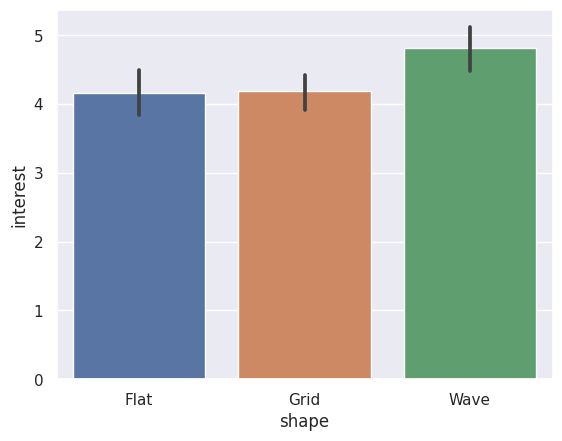

In [75]:
# Aderência dos dados à distribuição normal
sns.set(style='darkgrid')
sns.barplot(data=hedges_filtered, x='shape', y='interest')
plt.show()

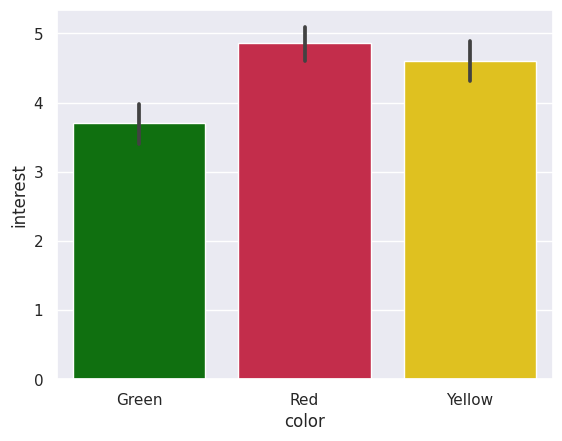

In [76]:
# Aderência dos dados à distribuição normal
sns.set(style='darkgrid')
sns.barplot(data=hedges_filtered, x='color', y='interest', palette=['green', 'crimson', 'gold'])
plt.show()

Para outras cores veja: [código de cores html](https://htmlcolorcodes.com/color-names/)

In [99]:
# Teste de aderência à distribuição Normal (Shapiro-Wilk)
pg.normality(data=hedges_filtered, dv='interest', group='shape')

,W,pval,normal
Flat,0.942153,0.001481,False
Grid,0.898629,0.000013,False
Wave,0.899096,0.000014,False


In [68]:
# Agrupar amostras por condição
flat = hedges[hedges['shape'] == 'flat']
grid = hedges[hedges['shape'] == 'grid']
wave = hedges[hedges['shape'] == 'wave']

In [98]:
pg.rm_anova(data=hedges, dv='interest', within=['shape', 'color'], subject='env_id', detailed=True)

/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/pingouin/parametric.py:742: RuntimeWarning: invalid value encountered in double_scalars
  f_a = ms_a / ms_as
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/pingouin/parametric.py:743: RuntimeWarning: invalid value encountered in double_scalars
  f_b = ms_b / ms_bs
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/pingouin/parametric.py:744: RuntimeWarning: invalid value encountered in double_scalars
  f_ab = ms_ab / ms_abs
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/pingouin/parametric.py:759: RuntimeWarning: invalid value encountered in double_scalars
  ef_a = ss_a / (ss_a + ss_s + ss_as + ss_bs + ss_abs)
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/pingouin/parametric.py:760: RuntimeWarning: invalid value encountered in double_scalars
  ef_b = ss_b / (ss_b + ss_s + ss_as + ss_bs + ss_abs)
/home/marianne

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,shape,0.0,-1,1,-0.0,NaN,NaN,NaN,NaN,1.0
1,color,0.0,-1,1,-0.0,NaN,NaN,NaN,NaN,1.0
2,shape * color,0.0,1,-1,0.0,NaN,NaN,NaN,NaN,NaN


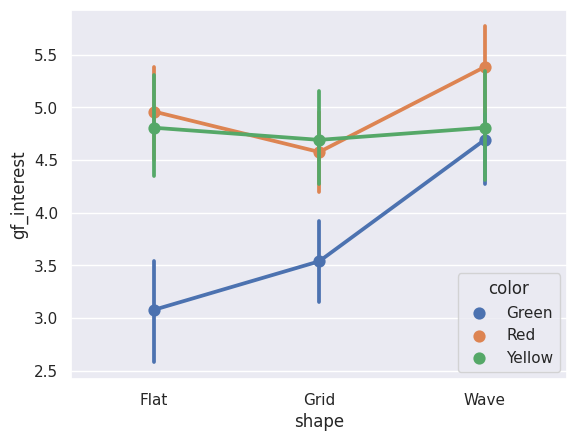

In [112]:
# Point plot das médias
sns.pointplot(data=hedges_filtered, x='shape',  y='gf_interest', hue='color')
plt.show()

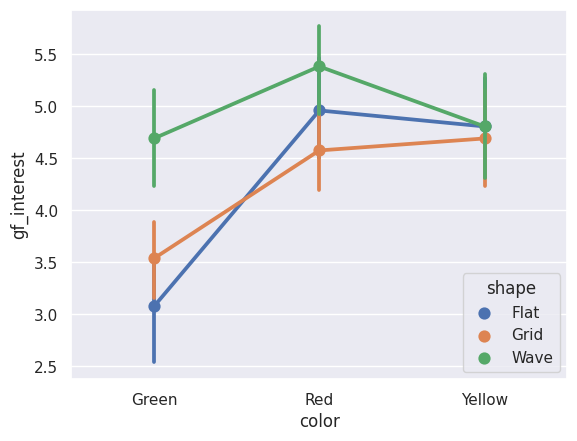

In [108]:
# Point plot das médias
sns.pointplot(data=hedges_filtered, x='color',  y='gf_interest', hue='shape')
plt.show()